In [25]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [93]:
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer



In [11]:
urls_of_speeches = [
"https://presidency.gov.gh/index.php/briefing-room/speeches/147-address-delivered-by-president-akufo-addo-on-the-occasion-of-the-swearing-into-office-of-members-of-the-council-of-state",
"https://presidency.gov.gh/index.php/briefing-room/speeches/275-address-by-the-president-akufo-addo-at-the-swearing-into-office-of-the-chief-justice-of-the-republic-justice-sophia-akuffo",
"http://www.gaccgh.org/details.cfm?Full%20Text:%20Akufo-Addo%27s%20speech%20at%20CJ%20swearing%20in&corpnews_catid=7&corpnews_scatid=37&corpnews_scatlinkid=256",
"https://presidency.gov.gh/index.php/briefing-room/speeches/499-statement-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-at-the-silver-jubilee-celebration-of-the-4th-republic",
"https://presidency.gov.gh/index.php/briefing-room/speeches/532-message-on-the-state-of-the-nation-delivered-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-on-thursday-8th-february-2018-in-parliament-parliament-house-accra",
"https://www.mynewsgh.com/presidents-full-speech-talks-ghana-beyond-crime-jobs-corruption-and-the-economy/",
"https://presidency.gov.gh/index.php/briefing-room/speeches/568-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-on-the-occasion-of-ghana-s-61st-independence-day-celebration-at-the-independence-square",
"https://presidency.gov.gh/index.php/briefing-room/speeches/643-may-day-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-on-tuesday-1st-may-2018-at-the-baba-yara-sports-stadium-kumasi-on-sustainable-development-goals-and-decent-work-the-role-of-social-partners",
"https://presidency.gov.gh/index.php/briefing-room/speeches/652-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-at-the-launch-of-the-university-of-ghana-s-endowment-fund-on-monday-7th-may-2018-at-the-great-hall-university-of-ghana-legon-accra",
"https://presidency.gov.gh/index.php/briefing-room/speeches/694-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-at-the-eid-ul-fitr-celebration-at-the-independence-square-accra-on-friday-15th-june-2018",
"https://presidency.gov.gh/index.php/briefing-room/speeches/721-speech-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-at-the-new-patriotic-party-s-annual-delegates-conference-in-koforidua-on-saturday-7th-july-2018-on-the-theme-building-a-stronger-party-delivering-prosperity-for-ghanaians",
"https://presidency.gov.gh/index.php/briefing-room/speeches/758-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-at-2018-annual-internal-audit-conference-on-wednesday-1st-august-2018",
"https://presidency.gov.gh/index.php/briefing-room/speeches/839-president-akufo-addo-s-speech-at-73rd-un-general-assembly",
"https://presidency.gov.gh/index.php/briefing-room/speeches/860-address-by-president-akufo-addo-at-the-passing-out-ceremony-for-100-000-nation-builders-corps-trainees",
"https://presidency.gov.gh/index.php/briefing-room/speeches/933-speech-by-the-president-akufo-addo-at-the-34th-annual-national-farmers-day-celebration",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1101-speech-by-president-akufo-addo-at-the-62nd-independence-day-celebration-parade",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1170-speech-by-president-akufo-addo-at-the-2019-may-day-celebration-parade",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1511-message-on-the-state-of-the-nation-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo-on-the-occasion-of-the-state-opening-of-parliament-on-thursday-20th-february-2020",
"https://presidency.gov.gh/index.php/briefing-room/speeches?start=50",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1578-president-akufo-addo-s-may-day-celebration-speech",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1603-speech-by-president-akufo-addo-during-acclamation-ceremony",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1666-speech-by-akufo-addo-at-the-launch-of-the-2020-manifesto-of-the-new-patriotic-party",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1842-address-to-the-nation-by-president-akufo-addo-on-6th-december-2020",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1844-akufo-addo-speaks-on-his-re-election-as-president-of-the-republic-of-ghana",
"https://presidency.gov.gh/index.php/briefing-room/news-style-2/2099-my-gov-t-has-taken-the-boldest-initiatives-ever-to-fight-corruption-president-akufo-addo",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1849-message-on-the-president-akufo-addo-s-address-to-the-nation-on-the-dissolution-of-the-7th-parliament",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1850-inaugural-address-by-the-president-of-the-republic-nana-addo-dankwa-akufo-addo",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1867-speech-by-president-akufo-addo-at-the-64th-independence-day-celebration",
"https://presidency.gov.gh/index.php/briefing-room/speeches/1869-2021-state-of-the-nation-by-president-nana-addo-dankwa-akufo-addo",
"https://presidency.gov.gh/index.php/briefing-room/speeches/2168-message-on-the-state-of-the-nation-by-the-president-akufo-addo"
]

In [91]:
def speech_transcripts(url):
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    

    page = session.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find_all('p')]
    return text

In [15]:
speeches = [speech_transcripts(speech_url) for speech_url in urls_of_speeches]

In [16]:
speeches

[['Newly sworn Members of the Council of State, let me start by congratulating all you distinguished ladies and gentlemen on your membership of the Council of State. Some of you are here by virtue of institutional representation, one ex-officio and the others with the support of Parliament; some by virtue of having been elected as regional representatives; and others having been appointed directly by the President of the Republic.',
  'We have no living former Chief Justice, unfortunately, to complete the composition.',
  'Whichever route you have taken, you are now all Members of this very august institution, which, in the wisdom of our Constitution, is the body to counsel the President in the performance of his functions.',
  'Members of the Council, our elders say that it is always better to get the benefit of two or more opinions than to rely on one viewpoint. I believe the Akan saying is “tikro nko agyina”. In our custom, therefore, no matter how smart or how well endowed, every c

In [17]:
len(speeches)

30

In [18]:
# Periods when speeches were given
periods_given = ['Feb 2017', 'Jun 2017_1', 'Jun 2017_2', 'Jan 2018', 'Feb 2018', 'Mar 2018_1', 'Mar 2018_2', 'May 2018_1', 'May 2018_2',
                 'Jun 2018', 'July 2018', 'Aug 2018', ' Sep 2018', 'Oct 2018', 'Dec 2018', 'Mar 2019', 'May 2019', 'Feb 2020', 
                 'Mar 2020_1', 'May 2020_2', 'Jun 2020', 'Aug 2020', 'Dec 2020_1', 'Dec 2020_2', 'Dec 2020_3', 'Jan 2021_1', 'Jan 2021_2',
                 'Mar 2021_1', 'Mar 2021_2', 'Mar 2022']
len(periods_given)

30

In [42]:
mkdir speeches_by_presidents

In [96]:
def clean_text(text): 
    text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\r', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\xa0', '', text)

    return text

In [98]:
def clean_texts(text): 
   # text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\r', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\xa0', '', text)

    return text

In [26]:
cleaned_speeches = [clean_text(speech) for speech in joined_speeches]

In [27]:
len(cleaned_speeches)

0

In [28]:
cleaned_speeches

[]

In [14]:
import pickle as pkl
import pandas as pd
with open("speech_corpus.pkl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'speech.csv')

In [10]:
df = pd.read_csv('speech.csv')

In [11]:
df

,Period,Speech
0,Feb 2017,newly sworn members of the council of state le...
1,Jun 2017_1,we are gathered here this afternoon to perform...
2,Jun 2017_2,infogaccghorg gacc campaign tracker ...
3,Jan 2018,let me begin by recalling that on this auspici...
4,Feb 2018,mr speaker i am happy to be here again in this...
5,Mar 2018_1,published on by the president of the republic ...
6,Mar 2018_2,it is sixtyone years today since our nation gh...
7,May 2018_1,i thank the leadership of organised labour ve...
8,May 2018_2,it is always a great pleasure to come back to...
9,Jun 2018,i salute you with the greetings of peace in i...


In [12]:
df['Speech']

0     newly sworn members of the council of state le...
1     we are gathered here this afternoon to perform...
2           infogaccghorg    gacc campaign tracker  ...
3     let me begin by recalling that on this auspici...
4     mr speaker i am happy to be here again in this...
5     published on by the president of the republic ...
6     it is sixtyone years today since our nation gh...
7      i thank the leadership of organised labour ve...
8      it is always a great pleasure to come back to...
9      i salute you with the greetings of peace in i...
10     last week on june  our nation suffered an une...
11     i am glad to be able to join you for this yea...
12    madam president secretarygeneral your excellen...
13     i begin with words from holy scripture in psa...
14     i am very happy to be here this morning and t...
15      speech by the president of the republicnana ...
16    i am happy to have the opportunity to be among...
17       mr speaker i am glad to be here again i

In [15]:
with open('speech_corpus.pkl', 'rb') as f:
    data = pkl.load(f)

In [47]:
data

,Speech
Period,
Feb 2017,newly sworn members of the council of state le...
Jun 2017_1,we are gathered here this afternoon to perform...
Jun 2017_2,infogaccghorg gacc campaign tracker ...
Jan 2018,let me begin by recalling that on this auspici...
Feb 2018,mr speaker i am happy to be here again in this...
Mar 2018_1,published on by the president of the republic ...
Mar 2018_2,it is sixtyone years today since our nation gh...
May 2018_1,i thank the leadership of organised labour ve...
May 2018_2,it is always a great pleasure to come back to...


In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
#stops= stops.add('units')

print(stops)

{'who', 'didn', 'because', 'be', "haven't", 'i', 'with', 'll', 'for', "needn't", "doesn't", 'y', 'yourselves', 's', 'theirs', 'under', 'at', 'just', 'between', 'then', 'won', 'after', 'that', 'm', 'have', 'weren', 'what', 'whom', 'was', 'once', 'by', 'than', "didn't", "don't", 'my', 'when', 'very', 'its', "mustn't", 'here', 'nor', "you'd", 'not', "shouldn't", "couldn't", 'the', 'it', 'he', "she's", "aren't", 'into', 'there', 'having', 'doesn', 'you', 'myself', 'haven', 'needn', 'hers', 'any', 'can', "wouldn't", 'ours', 'now', "hasn't", 'don', 'down', 'am', 'are', 'so', "won't", 'few', 'other', "that'll", 'her', 'against', 'too', 're', 'off', 'and', 'ourselves', 'hadn', 'o', 'isn', 'why', 'from', 'ain', "hadn't", 'up', 'through', 'his', "you're", 'me', 'themselves', 'above', 'yours', 'yourself', 'has', 'should', 'before', 'same', 'where', 'been', 'himself', 'couldn', 'on', 'our', 'herself', 'while', 'such', 'out', 'itself', 'to', 'will', 'shan', 'mustn', 'no', 'which', "you'll", 'had', 

In [17]:
doc = df['Speech']
doc

Period
Feb 2017      newly sworn members of the council of state le...
Jun 2017_1    we are gathered here this afternoon to perform...
Jun 2017_2          infogaccghorg    gacc campaign tracker  ...
Jan 2018      let me begin by recalling that on this auspici...
Feb 2018      mr speaker i am happy to be here again in this...
Mar 2018_1    published on by the president of the republic ...
Mar 2018_2    it is sixtyone years today since our nation gh...
May 2018_1     i thank the leadership of organised labour ve...
May 2018_2     it is always a great pleasure to come back to...
Jun 2018       i salute you with the greetings of peace in i...
July 2018      last week on june  our nation suffered an une...
Aug 2018       i am glad to be able to join you for this yea...
 Sep 2018     madam president secretarygeneral your excellen...
Oct 2018       i begin with words from holy scripture in psa...
Dec 2018       i am very happy to be here this morning and t...
Mar 2019        speech by the pre

In [18]:
docu = data['Speech']
docu

Period
Feb 2017      newly sworn members of the council of state le...
Jun 2017_1    we are gathered here this afternoon to perform...
Jun 2017_2          infogaccghorg    gacc campaign tracker  ...
Jan 2018      let me begin by recalling that on this auspici...
Feb 2018      mr speaker i am happy to be here again in this...
Mar 2018_1    published on by the president of the republic ...
Mar 2018_2    it is sixtyone years today since our nation gh...
May 2018_1     i thank the leadership of organised labour ve...
May 2018_2     it is always a great pleasure to come back to...
Jun 2018       i salute you with the greetings of peace in i...
July 2018      last week on june  our nation suffered an une...
Aug 2018       i am glad to be able to join you for this yea...
 Sep 2018     madam president secretarygeneral your excellen...
Oct 2018       i begin with words from holy scripture in psa...
Dec 2018       i am very happy to be here this morning and t...
Mar 2019        speech by the pre

In [19]:
speeches


NameError: name 'speeches' is not defined

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow



In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(doc)

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
encoded_docs = tokenizer.texts_to_sequences(doc)
encoded_docs
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence

array([[ 164,   42,   12, ...,  383,  122,  384],
       [   8,  512, 3253, ...,  383,  122,  384],
       [   0,    0,    0, ..., 4681,   22, 4682],
       ...,
       [  58,  152,  108, ...,  383,  122,  384],
       [   5,   16,   23, ...,  383,  122,  384],
       [1360,    8, 3133, ...,  383,  122,  384]])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


vocab_size =   25768
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           824576    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 841,227
Trainable params: 841,227
Non-trainable params: 0
________________________________________________

In [31]:
docu

Period
Feb 2017      newly sworn members of the council of state le...
Jun 2017_1    we are gathered here this afternoon to perform...
Jun 2017_2          infogaccghorg    gacc campaign tracker  ...
Jan 2018      let me begin by recalling that on this auspici...
Feb 2018      mr speaker i am happy to be here again in this...
Mar 2018_1    published on by the president of the republic ...
Mar 2018_2    it is sixtyone years today since our nation gh...
May 2018_1     i thank the leadership of organised labour ve...
May 2018_2     it is always a great pleasure to come back to...
Jun 2018       i salute you with the greetings of peace in i...
July 2018      last week on june  our nation suffered an une...
Aug 2018       i am glad to be able to join you for this yea...
 Sep 2018     madam president secretarygeneral your excellen...
Oct 2018       i begin with words from holy scripture in psa...
Dec 2018       i am very happy to be here this morning and t...
Mar 2019        speech by the pre

In [33]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [36]:
#importing the library 
from textblob import TextBlob

#determining polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['Polarity'] = data['Speech'].apply(pol)
data['Subjectivity'] = data['Speech'].apply(sub)
data

,Speech,Polarity,Subjectivity
Period,,,
Feb 2017,newly sworn members of the council of state le...,0.184982,0.541451
Jun 2017_1,we are gathered here this afternoon to perform...,0.123897,0.433714
Jun 2017_2,infogaccghorg gacc campaign tracker ...,0.268750,0.510417
Jan 2018,let me begin by recalling that on this auspici...,0.138999,0.438413
Feb 2018,mr speaker i am happy to be here again in this...,0.169242,0.445072
Mar 2018_1,published on by the president of the republic ...,0.158431,0.490981
Mar 2018_2,it is sixtyone years today since our nation gh...,0.156195,0.482335
May 2018_1,i thank the leadership of organised labour ve...,0.200823,0.468455
May 2018_2,it is always a great pleasure to come back to...,0.281237,0.522024


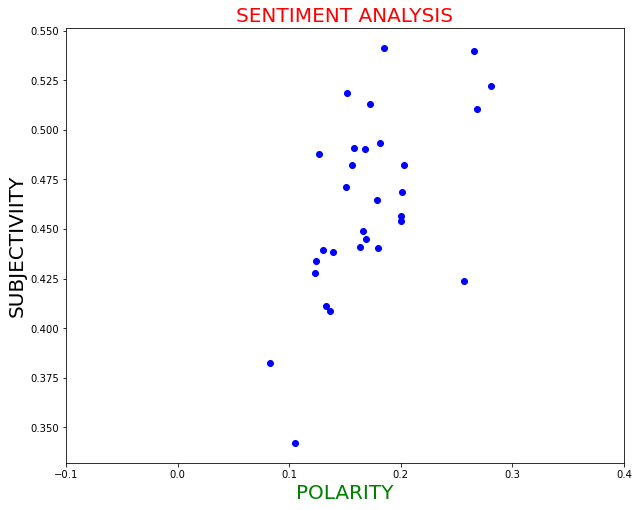

In [88]:
# Plotting the results of the cell above (Sentiment Analysis)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, aSpeech in enumerate(data.index):
    x = data.Polarity.loc[aSpeech]
    y = data.Subjectivity.loc[aSpeech]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, '', fontsize=20)
    plt.xlim(-.10, .40) 
    
plt.title('SENTIMENT ANALYSIS', fontsize=20, color = 'red')
plt.xlabel('POLARITY', fontsize=20, color = 'green')
plt.ylabel('SUBJECTIVIITY', fontsize=20)
plt.savefig('polarity_subjectivity.png')

plt.show()

In [40]:
# Splitting into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [41]:
# List to hold pieces of all texts in savedSpeeches
text_split = []
for t in data.Speech:
    split = split_text(t)
    text_split.append(split)
    
text_split

[['newly sworn members of the council of state let me start by congratulating all you distinguished ladies and gentlemen on your membership of the council of state some of you are here by virtue of institutional representation one exofficio and the others with the support of parliament some by virtue of having been elected as regional representatives and others having ',
  'been appointed directly by the president of the republic we have no living former chief justice unfortunately to complete the composition whichever route you have taken you are now all members of this very august institution which in the wisdom of our constitution is the body to counsel the president in the performance of his functions members of the council our eld',
  'ers say that it is always better to get the benefit of two or more opinions than to rely on one viewpoint i believe the akan saying is tikro nko agyina in our custom therefore no matter how smart or how well endowed every chief or leader has a group

In [42]:
# Polarity for each piece of text
polarity_speech = []
for lp in text_split:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_speech.append(polarity_piece)
    
polarity_speech

[[0.13636363636363635,
  0.1,
  0.3095238095238095,
  0.3125,
  0.23888888888888887,
  0.3666666666666667,
  0.55,
  -0.09999999999999999,
  0.21166666666666667,
  0.0995,
  -0.041666666666666664,
  0.10500000000000001,
  0.046753246753246755,
  0.5,
  0.24444444444444444,
  -0.175,
  0.09,
  -0.225,
  0.6000000000000001,
  0.011111111111111112],
 [0.0997202797202797,
  0.22916666666666669,
  0.3214285714285714,
  0.048863636363636366,
  -0.13125,
  0.05404040404040404,
  0.06746031746031746,
  0.043055555555555555,
  0.22499999999999998,
  0.03148148148148147,
  0.43854166666666666,
  0.12333333333333335,
  0.38690476190476186,
  0.11666666666666665,
  2.7755575615628915e-18,
  0.015306122448979593,
  0.034272727272727274,
  0.166969696969697,
  0.07121212121212121,
  0.22083333333333335],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.375,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [-0.021428571428571415,
  0.47000000000000003,
  0.024

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BrandedHustler\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [83]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"
digits = "([0-9])"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    if "..." in text: text = text.replace("...","<prd><prd><prd>")
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

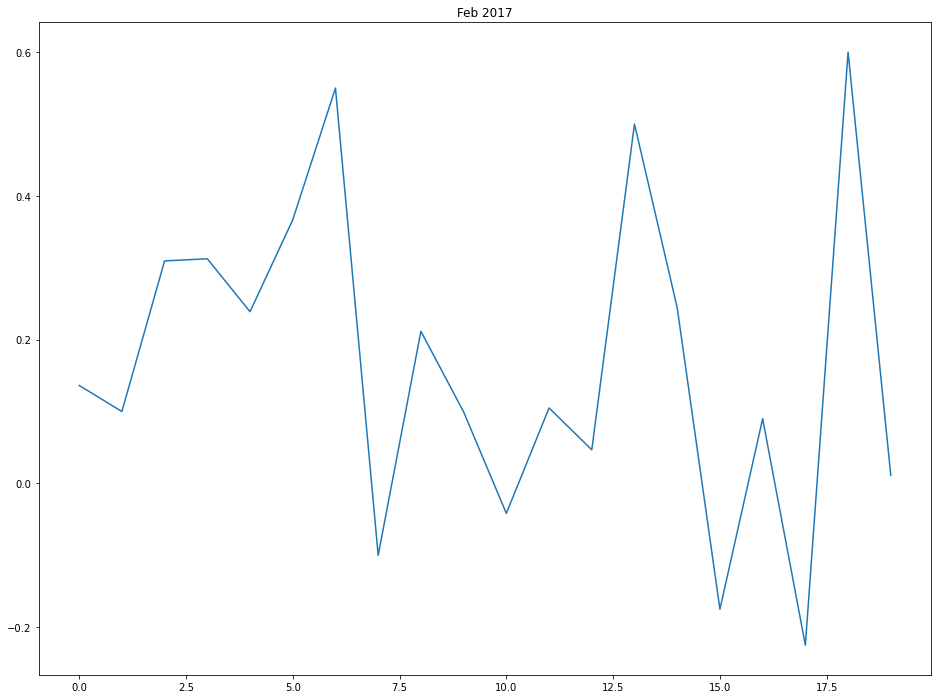

In [57]:
# Plot for one speech
plt.plot(polarity_speech[0])
plt.title(data.index[0])
plt.savefig('single_polarity.png')
plt.show()

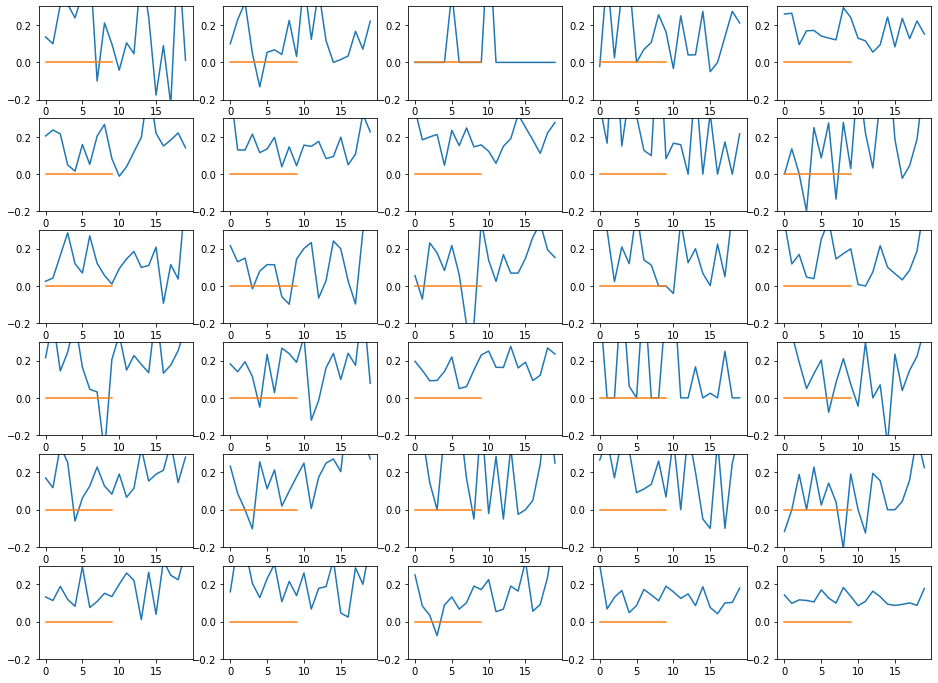

In [56]:
# Plot for all speeches
plt.rcParams['figure.figsize'] = [16, 12]

for index, aSpeech in enumerate(data.index):    
    plt.subplot(6, 5, index+1)
    plt.plot(polarity_speech[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    #plt.title("POLARITY")
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()